In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = (n'd)

Y = (n'1)

w = (d'1)

b = (n'1)

argmin sum(X.w+b-y)^2 + penalty.sum(abs(y))

In [6]:
def compute_objective(X, y, w, b, penalty):
    return np.sum(np.square(X@w+b-y)) + penalty*np.sum(np.abs(w))

In [15]:
def update_b(X,y,w):
    n,_ = X.shape
    return np.sum(y - X@w)/n

In [12]:
def lasso_coordinate_descent(X,y,w0,penalty,tol, debug=False):
    n,d = X.shape
    a = np.zeros(d)
    c = np.zeros(d)
    w_new = np.copy(w0)
    
    gradient_descending = True
    while gradient_descending:
        w_old = np.copy(w_new)
        b = update_b(X,y,w_new)
        for k in range(d):
            a[k] = 2*np.sum(np.power(X[:,k],2))
            c[k] = np.sum(X[:,k]*(y - (b + X@w_new - X[:,k]*w_new[k])))
            
            if c[k] > penalty:
                w_new[k] = (c[k] - penalty)/a[k]
            elif c[k] < -penalty:
                w_new[k] = (c[k] + penalty)/a[k]
            else:
                w_new[k] = 0
                
        if debug:
            obj = compute_objective(X, y, w_new, b, penalty)
            print('obj: {}, w: {}'.format(obj, np.max(np.abs(w_new - w_old))))
        # ... if you're not moving more than tol in any component, exit
        gradient_descending = np.max(np.abs(w_new - w_old)) > tol
    return w_new,b

In [8]:
dim_n = 500
dim_d = 1000
dim_k = 100
sig = 1

In [16]:
# This sets up the data!
np.random.seed(1)
X_data = np.random.randn(dim_n, dim_d)
eps = sig*np.random.randn(dim_n)

w_exact = np.array([j/dim_k if j < dim_k else 0 for j in range(1,dim_d+1)])
y_data = np.dot(X_data,w_exact)+eps

w0 = np.random.rand(dim_d)
b = update_b(X_data,y_data, w0)

In [17]:
# Largest penalty
penalty_max = 2*np.max(np.abs(X_data.T@(y_data-np.mean(y_data))))
penalty_max

1511.7600099034335

In [30]:
wList = []
bList = []
pList = [penalty_max/np.power(3,i) for i in range(10)]
for aPenalty in pList:
    w, b = lasso_coordinate_descent(X_data,y_data,w0,aPenalty,tol=1e-1)
    wList.append(w)
    bList.append(b)

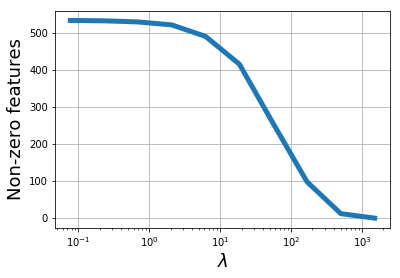

In [44]:
fig, ax = plt.subplots(1)
ax.plot(pList, [np.sum(w>0) for w in wList], lw=5)
ax.grid(True)
ax.set_xlabel('$\lambda$', fontsize=18)
ax.set_ylabel('Non-zero features', fontsize=18)
ax.set_xscale('log')
fig.savefig('prob3_1.png')

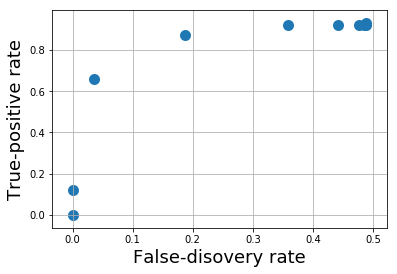

In [57]:
n_nonzero = np.sum(w_exact > 0)
n_zero =  np.sum(w_exact == 0)

FDR = [np.sum(w[dim_k:]>0)/(dim_d-dim_k) for w in wList]
TPR = [np.sum(w[:dim_k]>0)/dim_k for w in wList]

fig, ax = plt.subplots(1)
ax.scatter(FDR, TPR, lw=5)
ax.grid(True)
ax.set_xlabel('False-disovery rate', fontsize=18)
ax.set_ylabel('True-positive rate', fontsize=18)
fig.savefig('prob3_2.png')